In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets


In [27]:
data = pd.read_csv('../data/revised_weather.csv')

In [30]:
data.columns


Index(['dt', 'temp', 'feels_like', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'month', 'year', 'day', 'hour'],
      dtype='object')

In [3]:
# data['rain_1h'] = data['rain_1h'].where(data['rain_1h']==np.nan, 0)

data['rain_1h'] = np.where(data['rain_1h'].isnull(), 0, data['rain_1h'])
data['snow_1h'] = np.where(data['snow_1h'].isnull(), 0, data['snow_1h'])

In [4]:
data['rain_1h'].value_counts()

0.00     324815
0.11       1658
0.12       1421
0.13       1392
0.14       1319
          ...  
5.73          1
5.85          1
12.10         1
6.37          1
6.41          1
Name: rain_1h, Length: 720, dtype: int64

In [5]:
data['snow_1h'].value_counts()

0.00    365008
0.11       450
0.12       378
0.14       330
0.13       312
         ...  
2.39         1
2.94         1
4.08         1
2.82         1
2.93         1
Name: snow_1h, Length: 339, dtype: int64

In [6]:
pvt_tbl = data.pivot_table(values='rain_1h', index='year', columns='month', aggfunc='sum')

In [7]:
pvt_tbl_snw = data.pivot_table(values='snow_1h', index='year', columns='month', aggfunc='sum')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373464 entries, 0 to 373463
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   373464 non-null  object 
 1   temp                 373464 non-null  float64
 2   feels_like           373464 non-null  float64
 3   pressure             373464 non-null  int64  
 4   humidity             373464 non-null  int64  
 5   wind_speed           373464 non-null  float64
 6   wind_deg             373464 non-null  int64  
 7   rain_1h              373464 non-null  float64
 8   snow_1h              373464 non-null  float64
 9   clouds_all           373464 non-null  int64  
 10  weather_main         373464 non-null  object 
 11  weather_description  373464 non-null  object 
 12  month                373464 non-null  int64  
 13  year                 373464 non-null  int64  
 14  day                  373464 non-null  int64  
 15  hour             

## Rain by Month

-  Here I used a stripplot and a violinplot on the same axis. 
-  The violinplot helps show the density of distribution
-  The stripplot is a scatterplot for categorical (month here) data. 
-  The jitter argument helps show density of distribution, not as much as violinplot.
-  I like the individual points with the violinplot, like a scatterplot with regression line.


/home/nigel/.pyenv/versions/3.10.6/envs/taxifare-env/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


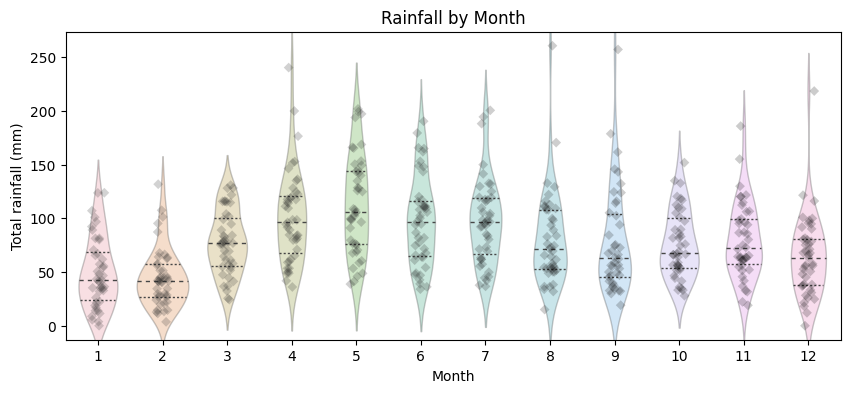

In [9]:
fig, ax = plt.subplots(figsize=(10,4))
sns.set_style('whitegrid')
sns.violinplot(data=pvt_tbl, ax=ax, inner='quartiles', linewidth=1, pallete = 'blues')
plt.setp(ax.collections, alpha=.3)
sns.stripplot(data=pvt_tbl,ax=ax, marker='D', jitter=True, alpha=.2, orient='v', s=5, color='black', linewidth=0).set_title(
    'Rainfall by Month')
plt.xlabel('Month')
plt.ylabel('Total rainfall (mm)')
plt.show()

<AxesSubplot: xlabel='month'>

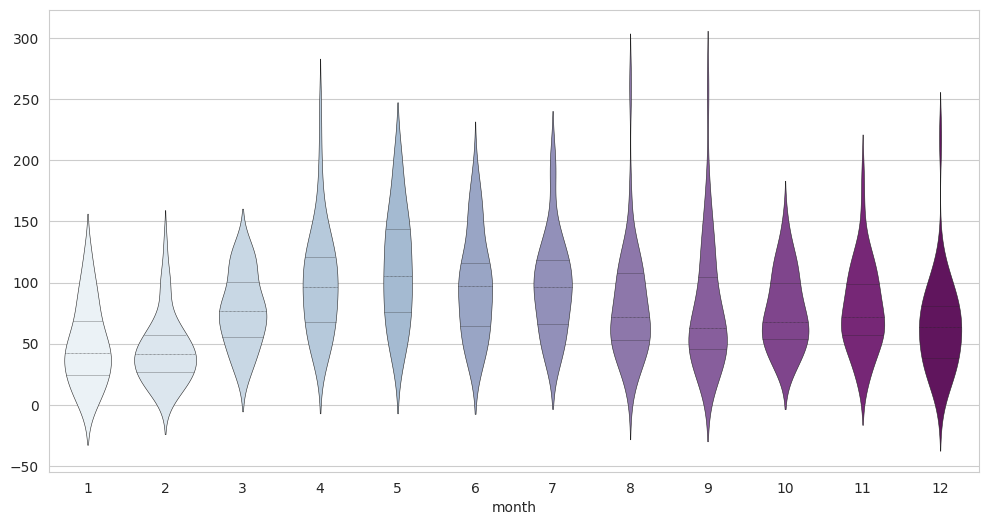

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(data=pvt_tbl, linewidth=.4, bw='silverman', palette='BuPu', alpha=.1, inner='quartiles')


In [11]:
data.columns

Index(['dt', 'temp', 'feels_like', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'month', 'year', 'day', 'hour'],
      dtype='object')

In [12]:
gb = data.groupby(['month', 'year'])

In [13]:
stacked = gb[['rain_1h', 'snow_1h', 'temp', 'weather_description', 'wind_speed']].agg({'rain_1h': 'sum', 
                                        'snow_1h': 'sum', 
                                        'temp': ['min', 'mean', 'median', 'max'], 
                                        'wind_speed': ['mean', 'max']})

In [14]:
rain = stacked[('rain_1h', 'sum')].unstack()

/home/nigel/.pyenv/versions/3.10.6/envs/taxifare-env/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='month'>

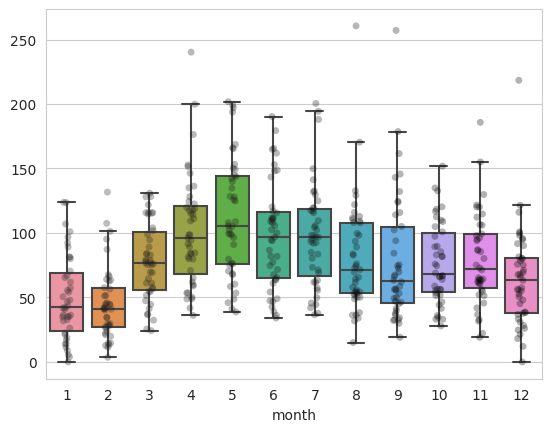

In [15]:
sns.stripplot(data=rain.transpose(), alpha=.3, color='black')
sns.boxplot(data=rain.transpose(), fliersize=0)

In [16]:
stacked

rain_1h snow_1h   temp                           wind_speed       
               sum     sum    min       mean  median    max       mean    max
month year                                                                   
1     1979   40.73   53.93  -7.67  22.131855  22.835  55.40   7.715739  16.58
      1980   18.81   23.00   2.59  28.014167  28.200  52.47   6.751142  19.13
      1981    0.00   13.38  -8.07  22.282110  23.855  52.32   6.771559  16.33
      1982   92.21   35.28 -18.33  21.906573  24.280  54.03   8.931962  20.58
      1983   34.83    9.24   6.67  30.684315  31.930  50.97   6.829530  14.16
...            ...     ...    ...        ...     ...    ...        ...    ...
12    2016   48.06   29.43   2.05  30.389005  32.520  65.84   7.709973  17.27
      2017   36.88   12.68  -2.00  28.551250  28.960  55.87   7.168683  17.47
      2018  121.43    1.84  15.82  34.980793  33.430  62.58   6.699113  18.97
      2019   94.77   14.57   8.80  35.522581  33.980  62.37   7.187218  18.95
      2020   26.00   37.00  12.47  33.097339  32.315  61.11   7.401935  16.33

[513 rows x 8 columns]

In [17]:
months = list(range(1,13))

In [18]:
dd1 = widgets.Dropdown(options=months, description='Month 1', value=1)
dd2 = widgets.Dropdown(options=months, description='Month 2', value=2)

In [19]:
ui = widgets.HBox([dd1, dd2])

In [24]:
def draw_boxplots(month1, month2):
    if month1 != month2:
        b_plot = sns.boxplot(data=rain.transpose().iloc[:,[month1-1, month2-1]], fliersize=0)
        s_plot = sns.stripplot(data=rain.transpose().iloc[:,[month1-1, month2-1]], alpha=.3, palette='dark:black')
    else:
        b_plot = sns.boxplot(data=rain.transpose().iloc[:,month1-1])
        s_plot = sns.stripplot(data=rain.transpose().iloc[:,month1-1], alpha=.3, palette='dark:black')

In [25]:
out = widgets.interactive_output(draw_boxplots, {'month1':dd1, 'month2':dd2})

In [26]:
display(ui, out)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 640x480 with 1 Axes>', 'i…

In [21]:
stacked.columns

MultiIndex([(   'rain_1h',    'sum'),
            (   'snow_1h',    'sum'),
            (      'temp',    'min'),
            (      'temp',   'mean'),
            (      'temp', 'median'),
            (      'temp',    'max'),
            ('wind_speed',   'mean'),
            ('wind_speed',    'max')],
           )

In [22]:
mean_wind = stacked[('wind_speed', 'mean')].unstack().applymap(lambda x: x * 2.237)
max_wind = stacked[('wind_speed', 'max')].unstack().applymap(lambda x: x * 2.237)

/home/nigel/.pyenv/versions/3.10.6/envs/taxifare-env/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: title={'center': 'Max Wind Speed'}, xlabel='Month', ylabel='Wind Speed in mph'>

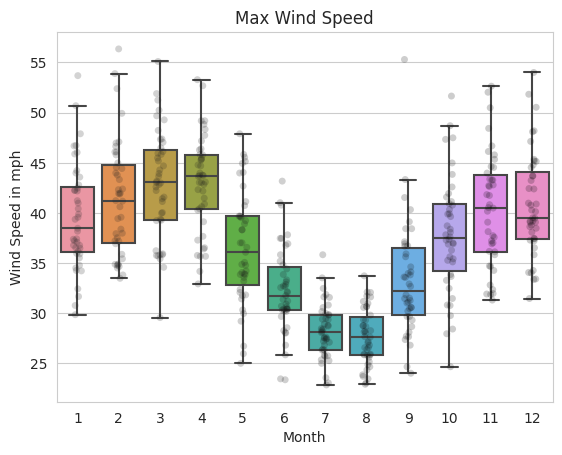

In [23]:
sns.boxplot(data=max_wind.transpose(), fliersize=0).set(title='Max Wind Speed', xlabel='Month', ylabel='Wind Speed in mph')
sns.stripplot(data=max_wind.transpose(), color='black', alpha=.2)

/home/nigel/.pyenv/versions/3.10.6/envs/taxifare-env/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


<AxesSubplot: title={'center': 'Mean Wind Speed'}, xlabel='Month', ylabel='Wind Speed in mph'>

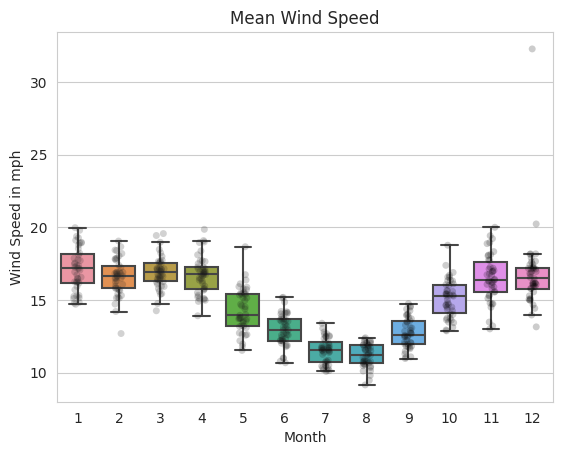

In [24]:
sns.boxplot(data=mean_wind.transpose(), fliersize=0).set(title='Mean Wind Speed', xlabel='Month', ylabel='Wind Speed in mph')
sns.stripplot(data=mean_wind.transpose(), color='black', alpha=.2)

In [22]:
apr_mask = data[data['month'] == 3].index

In [23]:
apr = data.loc[data['month'] == 4]

In [24]:
apr.groupby(['month', 'day'])

In [25]:
data.groupby('weather_description')[['temp', 'pressure', 'wind_speed', 'humidity', 'rain_1h']].agg({'temp': ['min', 'mean', 'max'],
                                                                                                   'pressure': ['min', 'mean', 'max'],
                                                                                                   'wind_speed': ['min', 'mean', 'max'],
                                                                                                   'humidity': ['min', 'mean', 'max'],
                                                                                                   'rain_1h': ['mean', 'sum']}).round(2)

temp                pressure                wind_speed  \
                        min   mean     max      min     mean   max        min   
weather_description                                                             
broken clouds        -18.33  52.98  102.18      988  1017.78  1047       0.00   
few clouds           -19.62  56.29   97.66      993  1018.26  1047       0.04   
heavy intensity rain  33.78  63.28   91.85      984  1008.53  1033       0.25   
heavy snow            18.93  25.80   30.79     1009  1011.60  1014       4.50   
light rain            33.55  57.15   99.16      976  1012.26  1036       0.02   
light snow            -8.32  26.13   33.53      986  1014.44  1038       0.36   
moderate rain         33.55  57.56   93.47      980  1010.63  1034       0.13   
overcast clouds      -18.13  47.45  100.13      988  1017.79  1047       0.04   
scattered clouds     -20.43  57.94   98.44      991  1017.49  1046       0.00   
sky is clear         -23.19  49.22   97.75      993  1020.99  1049       0.02   
snow                   5.23  27.73   33.53      986  1013.03  1034       0.18   
very heavy rain       64.24  64.24   64.24     1001  1001.00  1001      15.03   

                                   humidity             rain_1h            
                       mean    max      min   mean  max    mean       sum  
weather_description                                                        
broken clouds          6.58  23.20       19  70.42  100    0.00      0.00  
few clouds             5.99  21.14       19  69.94  100    0.00      0.00  
heavy intensity rain   8.19  22.57       45  92.81  100    5.44   4527.38  
heavy snow             5.82   7.78       80  90.20   98    0.00      0.00  
light rain             7.59  25.19       18  85.64  100    0.39  13702.38  
light snow             8.38  20.96       35  81.68  100    0.00      0.00  
moderate rain          8.05  24.00       37  91.90  100    1.86  22770.81  
overcast clouds        6.89  24.72       16  73.13  100    0.00      0.00  
scattered clouds       6.23  23.55       19  69.41  100    0.00      0.00  
sky is clear           5.69  22.46       16  68.61  100    0.00      0.00  
snow                   8.32  22.32       44  89.40  100    0.00      0.00  
very heavy rain       15.03  15.03       96  96.00   96   17.32     17.32

In [26]:
data[data['weather_description'] == 'very heavy rain']

dt   temp  feels_like  pressure  humidity  wind_speed  \
6157  1979-09-14 09:00:00  64.24       64.87      1001        96       15.03   

      wind_deg  rain_1h  snow_1h  clouds_all weather_main weather_description  \
6157       353    17.32      0.0         100         Rain     very heavy rain   

      month  year  day  hour  
6157      9  1979   14     9

In [27]:
data.groupby('weather_description')[['temp']].agg(pd.Series.mode)

temp
weather_description        
broken clouds         71.69
few clouds            65.05
heavy intensity rain  66.29
heavy snow            18.93
light rain            34.38
light snow            32.58
moderate rain         68.58
overcast clouds       32.58
scattered clouds      70.36
sky is clear          61.41
snow                  32.38
very heavy rain       64.24

<AxesSubplot:xlabel='None-month', ylabel='year'>

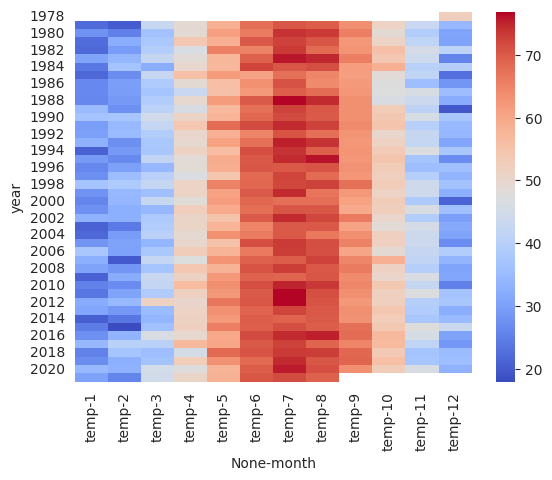

In [28]:
sns.heatmap(data.groupby(['year', 'month'])[['temp']].mean().unstack(), cmap='coolwarm')

#### Where does the wind come from when pressure is extremely low?  Extremely high?

[Text(0.5, 1.0, 'High Pressure - Wind Speed')]

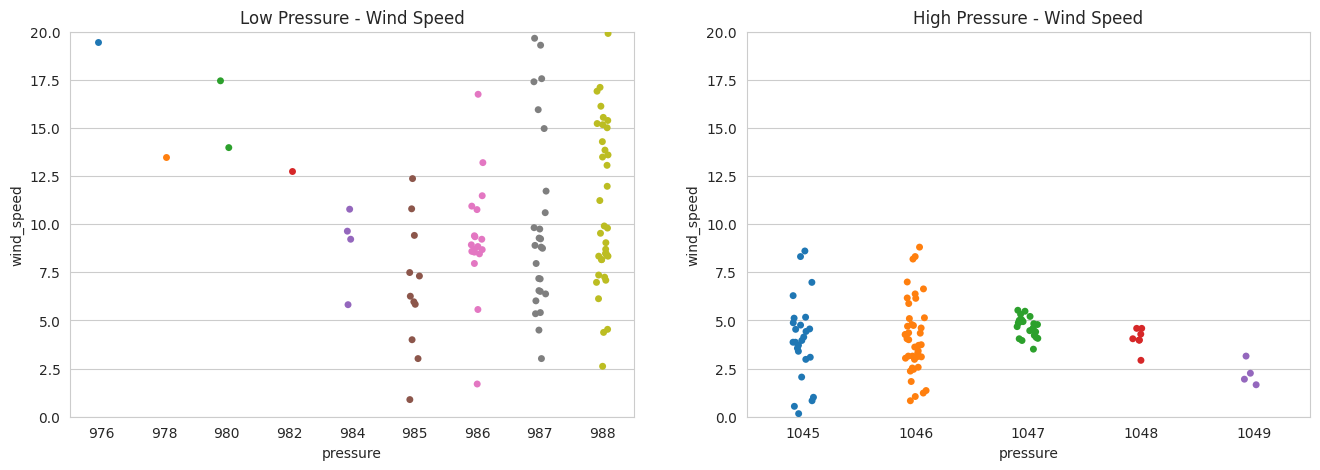

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
custom_ylim = (0, 20)
plt.setp([ax1, ax2], ylim=custom_ylim)
pressure_sorted_low = data.sort_values('pressure').head(100)
pressure_sorted_high = data.sort_values('pressure', ascending=False).head(100)
sns.stripplot(data=pressure_sorted_low, x='pressure', y='wind_speed', ax=ax1).set(title='Low Pressure - Wind Speed')
sns.stripplot(data=pressure_sorted_high, x='pressure', y='wind_speed', ax=ax2).set(title='High Pressure - Wind Speed')


In [30]:
data.sort_values('pressure').head(100)

dt   temp  feels_like  pressure  humidity  \
114275  1992-01-14 07:00:00  46.96       39.72       976        91   
114274  1992-01-14 06:00:00  47.05       41.27       978        92   
114273  1992-01-14 05:00:00  47.80       42.10       980        92   
114276  1992-01-14 08:00:00  43.84       36.12       980        95   
114272  1992-01-14 04:00:00  46.78       41.14       982        93   
...                     ...    ...         ...       ...       ...   
86325   1988-11-05 17:00:00  50.74       49.60       988        87   
106253  1991-02-14 01:00:00  39.07       35.91       988        96   
106264  1991-02-14 12:00:00  31.53       21.74       988        90   
500     1979-01-21 16:00:00  31.21       23.00       988        85   
106267  1991-02-14 15:00:00  33.66       23.58       988        78   

        wind_speed  wind_deg  rain_1h  snow_1h  clouds_all weather_main  \
114275       19.48       191     0.41     0.00          73         Rain   
114274       13.47       173     0.23     0.00          79         Rain   
114273       13.98       155     1.11     0.00          89         Rain   
114276       17.45       258     0.90     0.00         100         Rain   
114272       12.75       134     3.06     0.00          95         Rain   
...            ...       ...      ...      ...         ...          ...   
86325        11.97       246     0.10     0.00         100         Rain   
106253        4.38       119     0.91     0.00         100         Rain   
106264       13.06       266     0.00     0.33         100         Snow   
500           9.53       319     0.00     0.12         100         Snow   
106267       15.39       258     0.11     0.00         100         Rain   

       weather_description  month  year  day  hour  
114275          light rain      1  1992   14     7  
114274          light rain      1  1992   14     6  
114273       moderate rain      1  1992   14     5  
114276          light rain      1  1992   14     8  
114272       moderate rain      1  1992   14     4  
...                    ...    ...   ...  ...   ...  
86325           light rain     11  1988    5    17  
106253          light rain      2  1991   14     1  
106264          light snow      2  1991   14    12  
500             light snow      1  1979   21    16  
106267          light rain      2  1991   14    15  

[100 rows x 16 columns]

<AxesSubplot:xlabel='pressure', ylabel='wind_speed'>

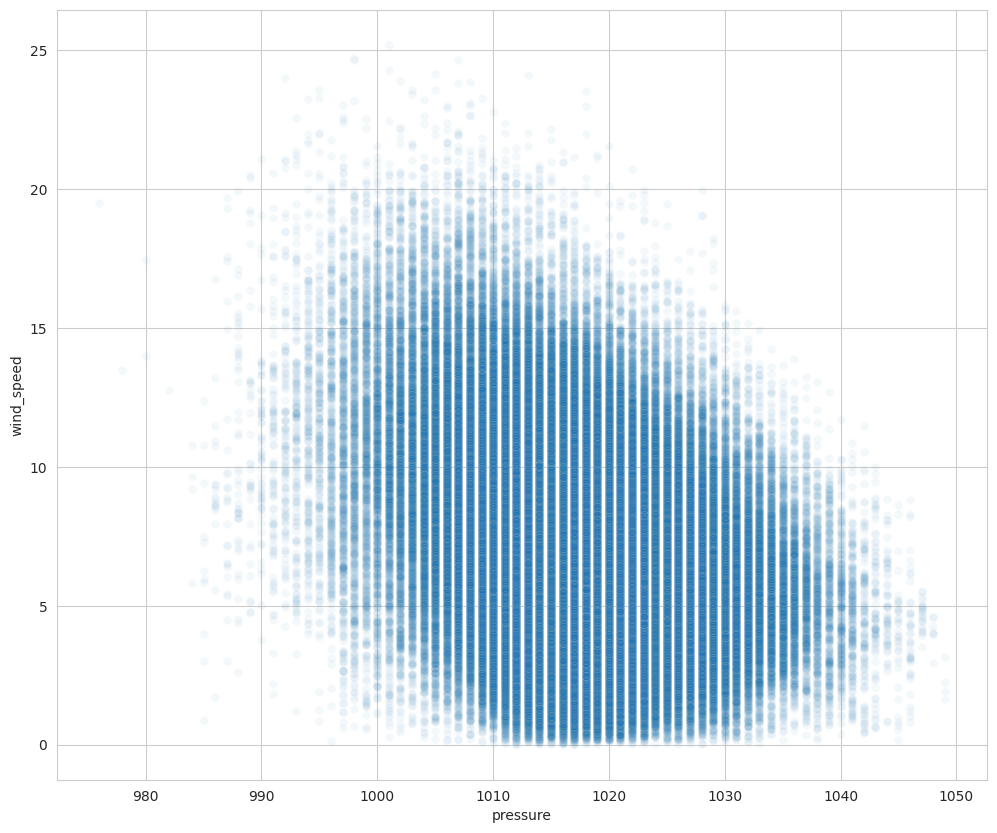

In [31]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x='pressure', y='wind_speed', data=data, alpha=.05)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='wind_speed'), data['wind_speed'], test_size=.3)

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [34]:
'''Here I want to encode my cyclical features: 
Wind Direction (degrees)
Time
'''

'Here I want to encode my cyclical features: \nWind Direction (degrees)\nTime\n'

In [35]:
pipe = make_pipeline(StandardScaler(),
                    LinearRegression())

In [36]:
pipe.fit(X_train, y_train)

ValueError: could not convert string to float: '2009-05-06 16:00:00'

In [ ]:
data.info()

In [75]:
data['dt'] = data['dt'].apply(pd.to_datetime)

In [77]:
import datetime

In [ ]:
tmp = datetime.datetime.timetuple(data['dt'][0])

In [ ]:
tmp.tm_yday

In [78]:
data['day_of_year'] = data['dt'].apply(lambda x: datetime.datetime.timetuple(x).tm_yday)

In [79]:
import math
pi = np.pi
def transformation(column):
  max_value = column.max()
  sin_values = [math.sin((2*pi*x)/max_value) for x in list(column)]
  cos_values = [math.cos((2*pi*x)/max_value) for x in list(column)]
  return sin_values, cos_values

In [80]:
data['day_sin'], data['day_cos'] = transformation(data['day_of_year'])

In [69]:
data['wind_sin'], data['wind_cos'] = transformation(data['wind_deg'])

In [ ]:
!pip install cufflinks


In [38]:
!pip update plotly

ERROR: unknown command "update"


In [46]:
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [47]:
cf.go_offline()

In [60]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline import *
init_notebook_mode(connected=False)
import chart_studio.plotly as py

In [61]:
data

dt   temp  feels_like  pressure  humidity  \
0       1978-12-31 20:00:00  51.49       50.86      1015        96   
1       1978-12-31 21:00:00  51.55       50.92      1014        96   
2       1978-12-31 22:00:00  51.67       51.06      1014        96   
3       1978-12-31 23:00:00  54.54       53.96      1013        91   
4       1979-01-01 00:00:00  54.57       53.96      1013        90   
...                     ...    ...         ...       ...       ...   
373459  2021-08-08 15:00:00  85.62       91.08      1017        62   
373460  2021-08-08 16:00:00  86.13       95.38      1016        70   
373461  2021-08-08 17:00:00  86.07       93.15      1016        65   
373462  2021-08-08 18:00:00  85.78       92.91      1016        66   
373463  2021-08-08 19:00:00  83.35       88.00      1016        66   

        wind_speed  wind_deg  rain_1h  snow_1h  clouds_all weather_main  \
0            12.91       176      0.0      0.0         100       Clouds   
1            14.00       178      0.0      0.0         100       Clouds   
2            14.81       185      0.0      0.0         100       Clouds   
3            16.02       186      0.0      0.0         100       Clouds   
4            16.13       187      0.0      0.0         100       Clouds   
...            ...       ...      ...      ...         ...          ...   
373459        6.53       213      0.0      0.0           0        Clear   
373460        5.26       229      0.0      0.0          62       Clouds   
373461        5.26       229      0.0      0.0          62       Clouds   
373462        5.26       229      0.0      0.0          62       Clouds   
373463        4.34       153      0.0      0.0           0        Clear   

       weather_description  month  year  day  hour  
0          overcast clouds     12  1978   31    20  
1          overcast clouds     12  1978   31    21  
2          overcast clouds     12  1978   31    22  
3          overcast clouds     12  1978   31    23  
4          overcast clouds      1  1979    1     0  
...                    ...    ...   ...  ...   ...  
373459        sky is clear      8  2021    8    15  
373460       broken clouds      8  2021    8    16  
373461       broken clouds      8  2021    8    17  
373462       broken clouds      8  2021    8    18  
373463        sky is clear      8  2021    8    19  

[373464 rows x 16 columns]

In [59]:
import plotly.express as px
fig = px.box(data[['year', 'month', 'rain_1h']].groupby('year').sum(), x="month", y="rain_1h")
fig.show()

In [62]:
data['weather_description'].value_counts()

overcast clouds         131123
sky is clear             74143
broken clouds            49371
scattered clouds         37771
light rain               35569
few clouds               23951
moderate rain            12246
light snow                5710
snow                      2741
heavy intensity rain       833
heavy snow                   5
very heavy rain              1
Name: weather_description, dtype: int64

In [70]:
data.columns

Index(['dt', 'temp', 'feels_like', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'month', 'year', 'day', 'hour', 'wind_sin',
       'wind_cos'],
      dtype='object')

In [81]:
# data['day_of_year_sin'], data['day_of_year_cos'] = transformation(data['day_of_year']) 
# Already did this above

In [82]:
data['month_sin'], data['month_cos'] = transformation(data['day_of_year'])

In [83]:
data.columns

Index(['dt', 'temp', 'feels_like', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'month', 'year', 'day', 'hour', 'wind_sin',
       'wind_cos', 'day_of_year', 'day_sin', 'day_cos', 'month_sin',
       'month_cos'],
      dtype='object')

In [88]:
model_data = data.drop(columns=['feels_like', 'wind_deg', 'weather_main', 'month', 'day', 'day_of_year'])

In [91]:
model_data.columns

Index(['dt', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'snow_1h', 'clouds_all', 'weather_description', 'year', 'hour',
       'wind_sin', 'wind_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos'],
      dtype='object')

In [107]:
lin_reg = LinearRegression()
from sklearn.preprocessing import OneHotEncoder

In [110]:
ohe = OneHotEncoder(sparse=False)

In [109]:
model_data.set_index('dt', inplace=True)

KeyError: "None of ['dt'] are in the columns"

In [112]:
ohe.fit(model_data[['weather_description']])

OneHotEncoder(sparse=False)

In [113]:
model_data[ohe.get_feature_names_out()] = ohe.transform(data[['weather_description']])

In [116]:
ohe.get_feature_names_out()

array(['weather_description_broken clouds',
       'weather_description_few clouds',
       'weather_description_heavy intensity rain',
       'weather_description_heavy snow', 'weather_description_light rain',
       'weather_description_light snow',
       'weather_description_moderate rain',
       'weather_description_overcast clouds',
       'weather_description_scattered clouds',
       'weather_description_sky is clear', 'weather_description_snow',
       'weather_description_very heavy rain'], dtype=object)

In [104]:
X_train = model_data.drop(columns='weather_description')[:250000]
y_train = model_data['weather_description'][:250000]
X_test = model_data.drop(columns='weather_description')[250000:]
y_test = model_data[250000:]

In [105]:
X_train

temp  pressure  humidity  wind_speed  rain_1h  snow_1h  \
dt                                                                             
1978-12-31 20:00:00  51.49      1015        96       12.91      0.0      0.0   
1978-12-31 21:00:00  51.55      1014        96       14.00      0.0      0.0   
1978-12-31 22:00:00  51.67      1014        96       14.81      0.0      0.0   
1978-12-31 23:00:00  54.54      1013        91       16.02      0.0      0.0   
1979-01-01 00:00:00  54.57      1013        90       16.13      0.0      0.0   
...                    ...       ...       ...         ...      ...      ...   
2007-07-09 07:00:00  66.88      1012        81        5.68      0.0      0.0   
2007-07-09 08:00:00  72.19      1013        81        4.52      0.0      0.0   
2007-07-09 09:00:00  76.60      1013        81        4.05      0.0      0.0   
2007-07-09 10:00:00  81.32      1013        70        4.85      0.0      0.0   
2007-07-09 11:00:00  84.25      1013        52        6.06      0.0      0.0   

                     clouds_all  year  hour  wind_sin  wind_cos   day_sin  \
dt                                                                          
1978-12-31 20:00:00         100  1978    20  0.069756 -0.997564 -0.017166   
1978-12-31 21:00:00         100  1978    21  0.034899 -0.999391 -0.017166   
1978-12-31 22:00:00         100  1978    22 -0.087156 -0.996195 -0.017166   
1978-12-31 23:00:00         100  1978    23 -0.104528 -0.994522 -0.017166   
1979-01-01 00:00:00         100  1979     0 -0.121869 -0.992546  0.017166   
...                         ...   ...   ...       ...       ...       ...   
2007-07-09 07:00:00           0  2007     7 -0.743145 -0.669131 -0.119881   
2007-07-09 08:00:00           0  2007     8 -0.615661 -0.788011 -0.119881   
2007-07-09 09:00:00           0  2007     9 -0.669131 -0.743145 -0.119881   
2007-07-09 10:00:00           0  2007    10 -0.754710 -0.656059 -0.119881   
2007-07-09 11:00:00           0  2007    11 -0.798636 -0.601815 -0.119881   

                      day_cos  month_sin  month_cos  
dt                                                   
1978-12-31 20:00:00  0.999853  -0.017166   0.999853  
1978-12-31 21:00:00  0.999853  -0.017166   0.999853  
1978-12-31 22:00:00  0.999853  -0.017166   0.999853  
1978-12-31 23:00:00  0.999853  -0.017166   0.999853  
1979-01-01 00:00:00  0.999853   0.017166   0.999853  
...                       ...        ...        ...  
2007-07-09 07:00:00 -0.992788  -0.119881  -0.992788  
2007-07-09 08:00:00 -0.992788  -0.119881  -0.992788  
2007-07-09 09:00:00 -0.992788  -0.119881  -0.992788  
2007-07-09 10:00:00 -0.992788  -0.119881  -0.992788  
2007-07-09 11:00:00 -0.992788  -0.119881  -0.992788  

[250000 rows x 15 columns]

In [106]:
lin_reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'overcast clouds'